In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

font = {'size': 18, 'family':'Latin Modern Roman'}
axislabelfontsize='large'
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
year = 365*24*3600 # Seconds
nobsinyear = 2*12 # Assuming stars are observed twice a month
fstar = (365*24*3600)**(-1)
tobs = 20/fstar
nobstot = nobsinyear* (tobs/year)

h0 = 2.15e-18

conversion = (2*(np.pi**2)*(fstar**2))*(2*fstar)/(3*(h0**2))

def Delta_p0(sigma,N):
    Dp0 = (np.sqrt(2/3)) * (sigma**2)/N
    return Dp0

from scipy.integrate import quad

def dfgamma(nI):
    df_gamma = lambda f: (f/ fstar)**nI
    lower_limit = 1/tobs
    upper_limit = 5e-8
    result, error = quad(df_gamma, lower_limit, upper_limit)
    return result

def deltaI0(sigma, nI, N):
    deltaI0 = Delta_p0((sigma), N)/dfgamma(nI)/np.sqrt(nobstot)
    return deltaI0

nI=-7/3
print(dfgamma(nI))
print(deltaI0( 2e-7, nI, 1000))


1.278145836388356e-06
1.1663082119112084e-12


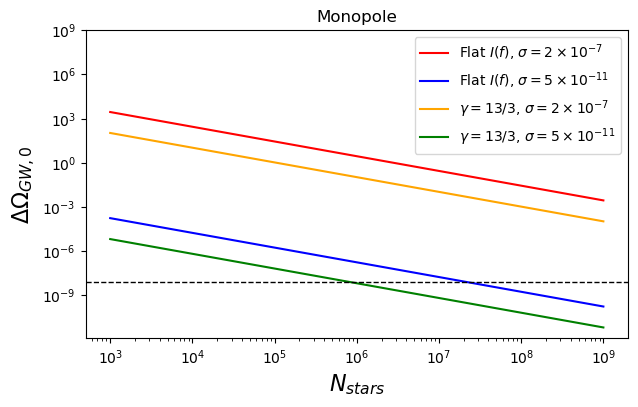

In [4]:
nI_1 = 0
nI_2 = -7/3
N = np.arange(1000, 10e8, 1000)

D_OmegaGW_1 = deltaI0( 2e-7, nI_1, N)*conversion
D_OmegaGW_2 = deltaI0( 5e-11, nI_1, N)*conversion
D_OmegaGW_3 = deltaI0( 2e-7, nI_2, N)*conversion
D_OmegaGW_4 = deltaI0( 5e-11, nI_2, N)*conversion

I0 = 9.1e-23*conversion

plt.figure(figsize=(7, 4))
plt.loglog(N, D_OmegaGW_1, color='r', label='Flat $I(f)$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_2, color='b', label='Flat $I(f)$, $\sigma = 5 \\times 10^{-11}$')
plt.loglog(N, D_OmegaGW_3, color='orange', label='$\gamma = 13/3$, $\sigma = 2 \\times 10^{-7}$')
plt.loglog(N, D_OmegaGW_4, color='g', label='$\gamma = 13/3$, $\sigma = 5 \\times 10^{-11}$')
plt.axhline(y=I0, color='black', linestyle='--', linewidth=1)
plt.ylim(top=10e8)
plt.xlabel(r'$N_{stars}$',size=16)
plt.ylabel("$\Delta \Omega_{GW,0}$",size=16)
plt.title("Monopole")
plt.legend()
#plt.grid(True)

plt.savefig("Forecast_Monopole.pdf", bbox_inches='tight')
